In [164]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import matplotlib.dates as mdates

In [165]:
DATA_PATH = "../superstonk-active-users"

In [166]:
# df column names
TIMESTAMP = "timestamp"
SUBREDDIT = "subreddit"
ONLINE = "online"
SUBSCRIBERS = "subscribers"


# read all data into tuple array
data = []
for file_name in filter(lambda file: file.endswith(".csv"), os.listdir(DATA_PATH)):
    with open(os.path.join(DATA_PATH, file_name), "r") as file:
        data.extend([tuple(line.split(",")) for line in file.read().splitlines()])

# filter out "None" values (probably program error)
for i in range(0, len(data)):
    line = list(data[i])
    if line[2] == "None":
        line[2] = -1
    if line[3] == "None":
        line[3] = -1
    
    line = tuple(line)
    data[i] = line

df = pd.DataFrame(data, columns=[TIMESTAMP, SUBREDDIT, ONLINE, SUBSCRIBERS])
df[TIMESTAMP] = pd.to_datetime(df[TIMESTAMP],unit="s") # convert timestamp column to datetime 
df = df.sort_values(TIMESTAMP, ascending=True) # sort by timestamp

# need to set to numeric
df[ONLINE] = pd.to_numeric(df[ONLINE])
df[SUBSCRIBERS] = pd.to_numeric(df[SUBSCRIBERS])

# Overview graphs
Graphs of user count timeline of all subreddits. (Subscriber values of 0 or less have been removed (Reddit/Program outage).)

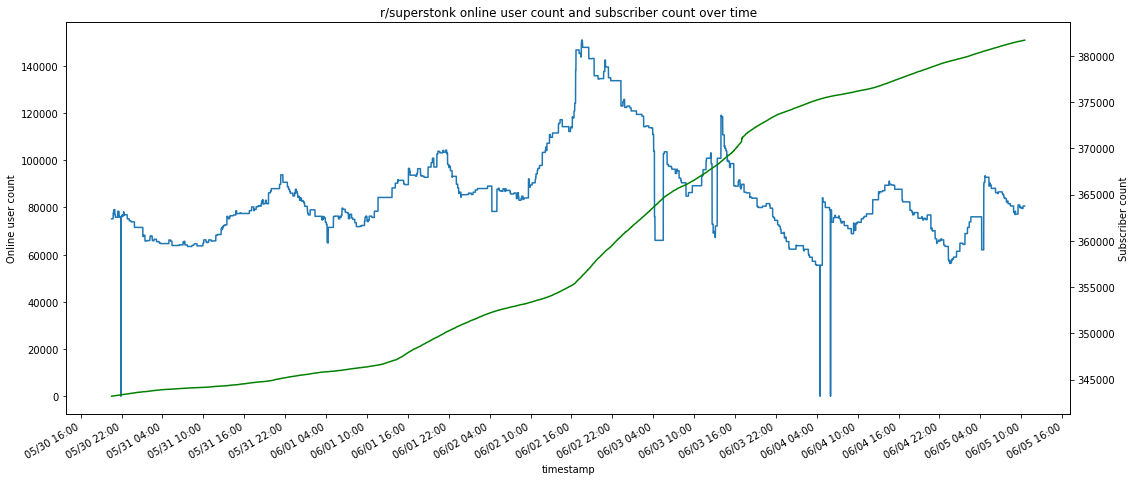

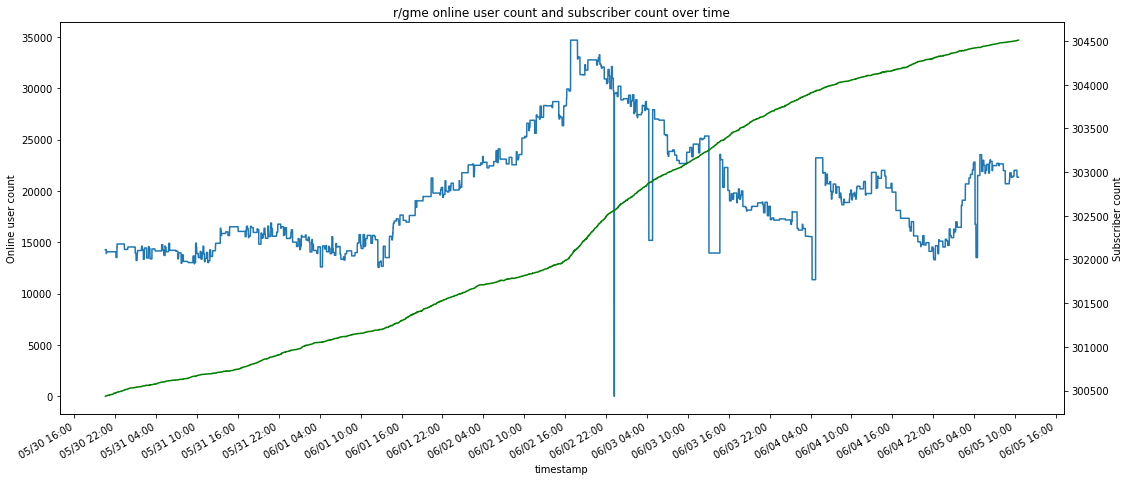

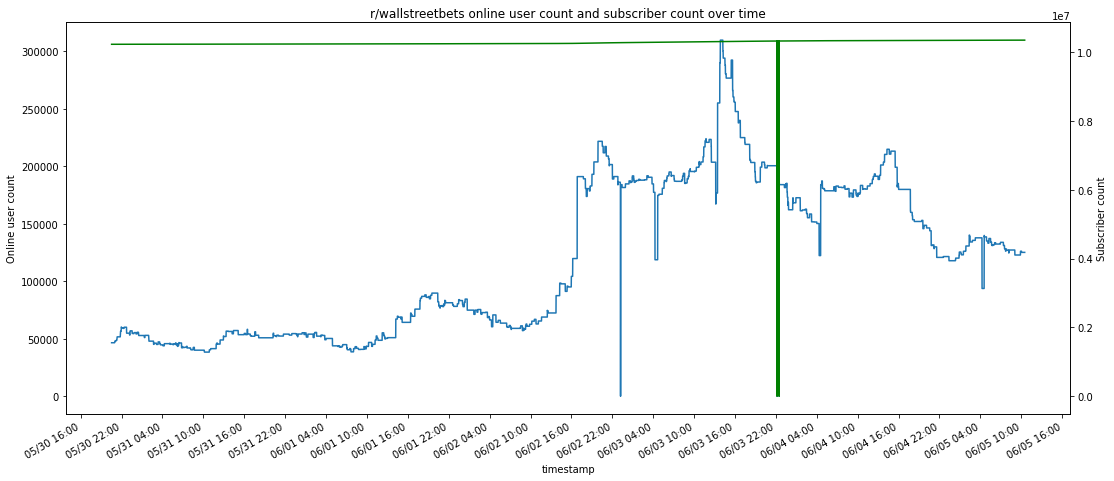

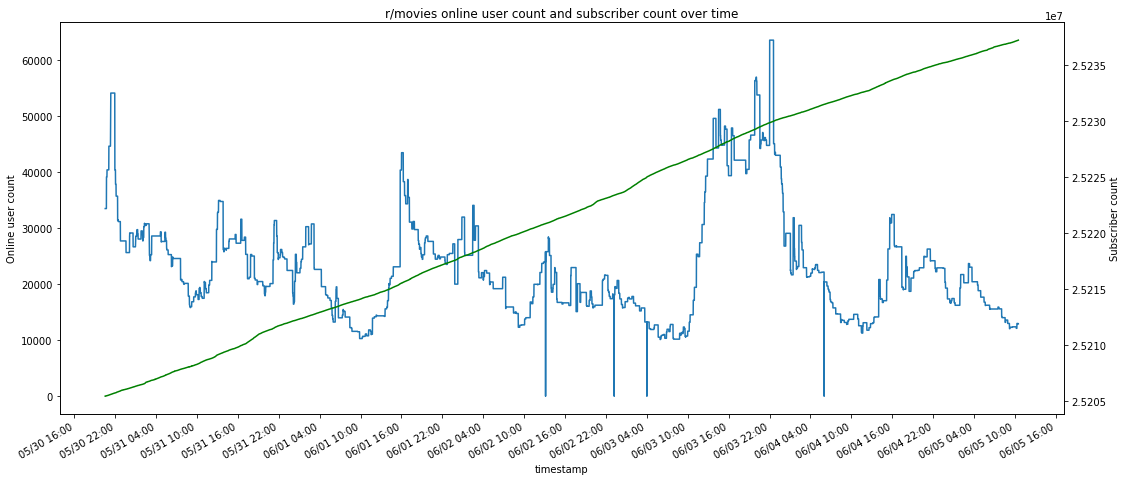

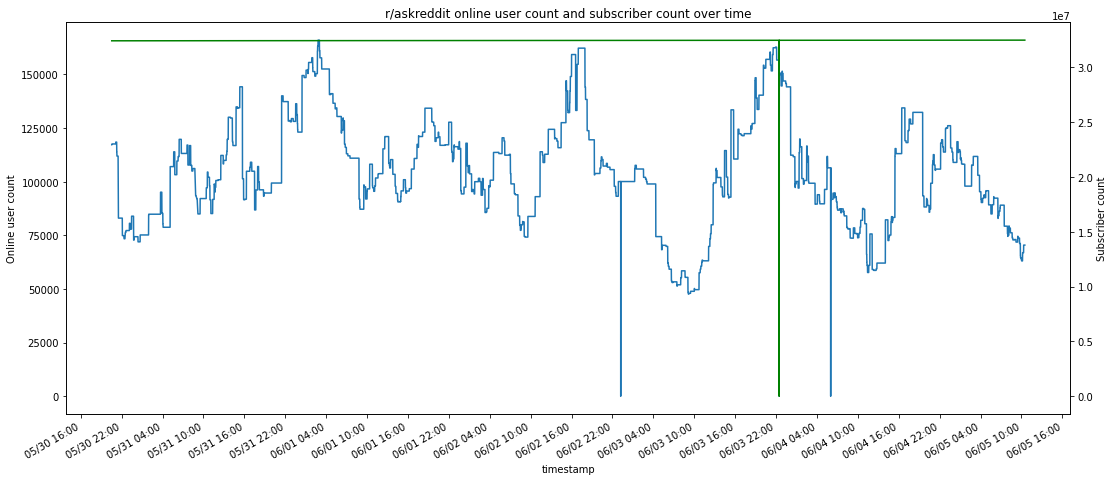

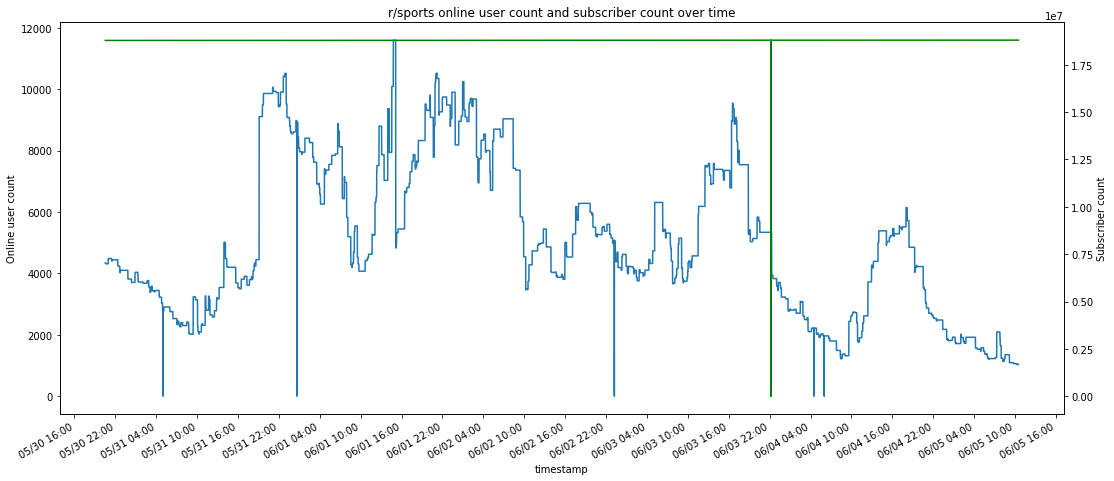

In [167]:
for subreddit in df[SUBREDDIT].unique():
    df_sr = df.loc[df[SUBREDDIT]==subreddit]
    df_sr = df_sr.set_index([TIMESTAMP])
    del df_sr[SUBREDDIT]
    #df_sr = df_sr[(np.abs(stats.zscore(df_sr)) < 3).all(axis=1)]

    plt.figure()
    plt.title(f"r/{subreddit} online user count and subscriber count over time")
    plt.ylabel("Online user count")
    ax = df_sr[ONLINE].plot(figsize=(18,8), x_compat=True)

    ax = df_sr[SUBSCRIBERS].plot(secondary_y=True, style="g")
    ax.set_ylabel("Subscriber count")

    hours = mdates.HourLocator(interval=6)
    h_fmt = mdates.DateFormatter("%m/%d %H:%M")
    ax.xaxis.set_major_locator(hours)
    ax.xaxis.set_major_formatter(h_fmt)
